In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import seaborn as sns
sns.set()   

# Breast Test

In [31]:
cancer_df = pd.read_csv("breast-w.csv", na_values = '?')
cancer_df = cancer_df.replace({'Class': {'benign': 0, 'malignant': 1}})
cancer_df = cancer_df.dropna()
cancer_df.describe()

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,0.349927
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.477296
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


## One-level decision tree (max_depth = 1)

In [113]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=1)

cols = list(cancer_df.columns)
x = cancer_df[cols[:-1]]
y = cancer_df[cols[-1]]

In [122]:
model.fit(x, y)
scores_one = cross_val_score(model, x, y, cv = 10)
scores_one = np.mean(scores_one)
scores_one

0.9093124530798692

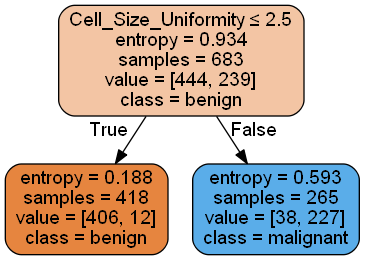

In [65]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = cols[:-1],
                class_names=['benign','malignant'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('pic/breast_1.png')
# Image(graph.create_png())
Image(graph.create_png())

## Multi-level decision tree (max_depth = none)

In [125]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=None)

cols = list(cancer_df.columns)
x = cancer_df[cols[:-1]]
y = cancer_df[cols[-1]]

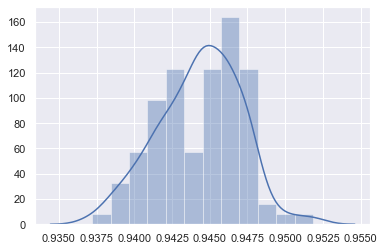

In [127]:
list_scores_multi = []
for i in range(100):
    model.fit(x, y)
    scores_multi = cross_val_score(model, x, y, cv = 10)
    scores_multi = np.mean(scores_multi)
    list_scores_multi.append(scores_multi)
    
sns.distplot(list_scores_multi)

In [128]:
# The rate increase by multi-level decision tree
rate = np.mean(list_scores_multi) - scores_one
rate

0.035003995368426466

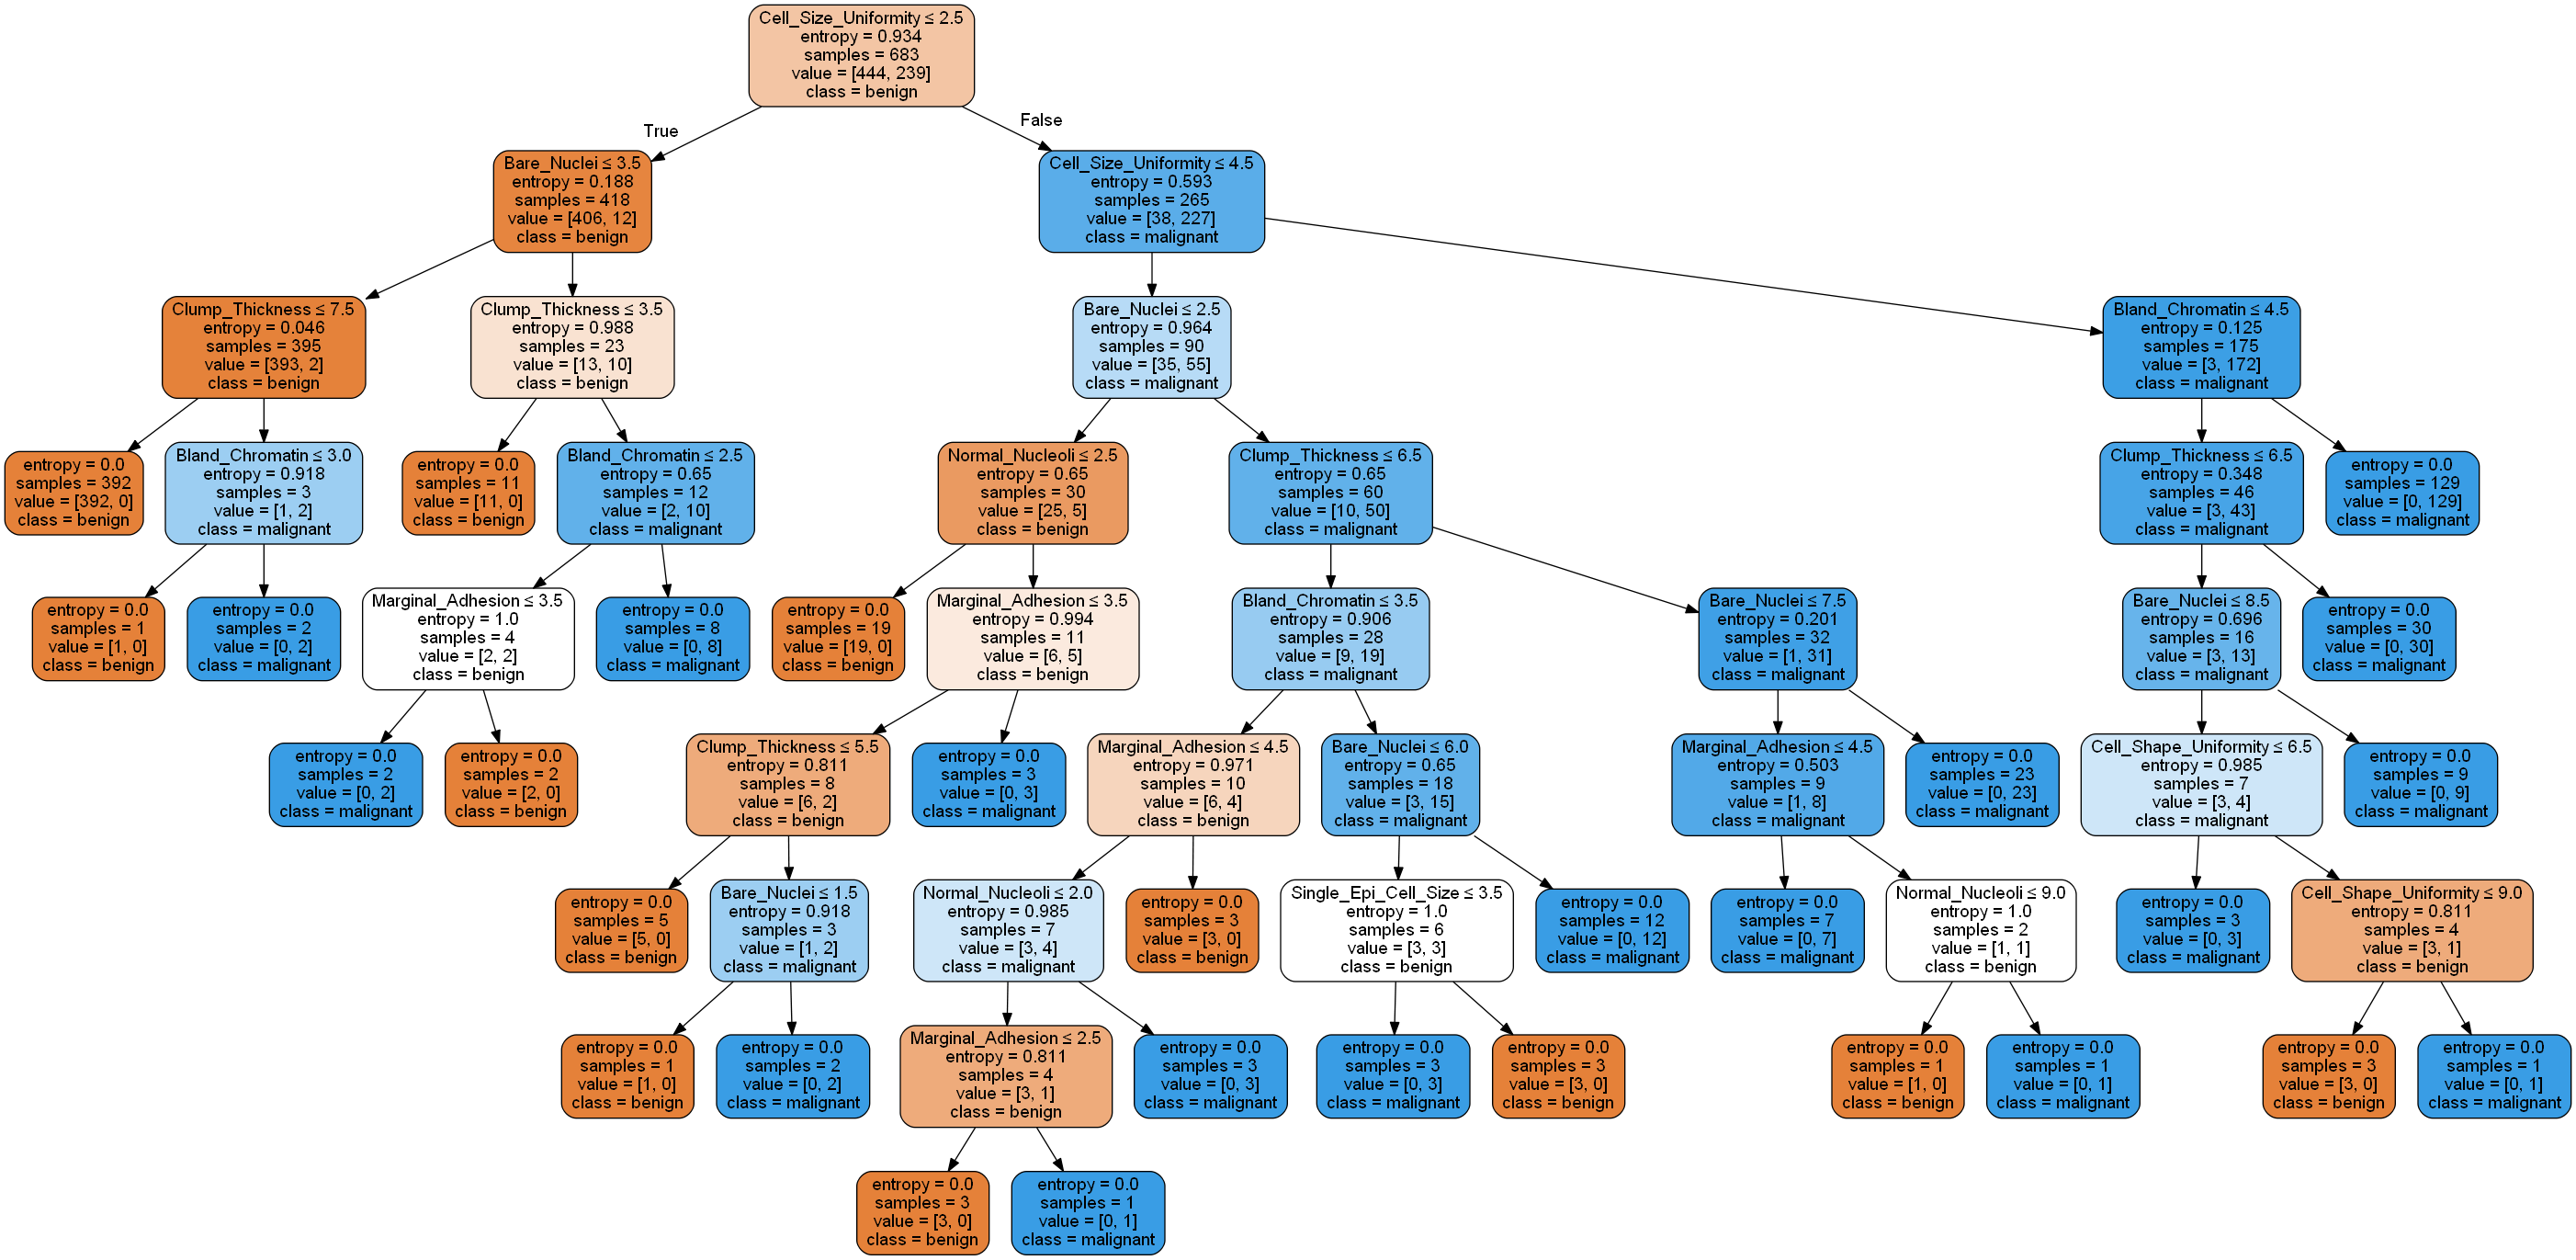

In [129]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = cols[:-1],
                class_names=['benign','malignant'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('pic/breast_2.png')
# Image(graph.create_png())
Image(graph.create_png())

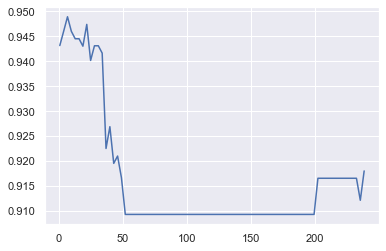

In [154]:
min_size = min(cancer_df['Class'].value_counts()[0], cancer_df['Class'].value_counts()[1])
list_accuracy = []
x_axis = []
for i in range(1, min_size, 3):
    model = DecisionTreeClassifier(criterion="entropy", max_depth=None, min_samples_leaf = i)
    model.fit(x, y)
    scores = cross_val_score(model, x, y, cv = 10)
    scores = np.mean(scores)
    list_accuracy.append(scores)
    x_axis.append(i)
    
plt.plot(x_axis, list_accuracy)

### From above pictures we can tell that once x over 200, the model becomes underfitting. 